##  <h1> <center> XYZ CAB ANALYSIS </center> </h1> 
#### <center> Week 2 of DG Internship </center>

In [1]:
#loading librarires
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format

In [14]:
#loading data
cab = pd.read_csv("Cab_Data.csv")
cab.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.02
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.20
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.89
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.88
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.26


In [15]:
#exploring data
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


#### We can see that there are no null values and that the date is formatted as excel serial format, we will turn it into iso formatting, the normal formatting everyone uses.

In [16]:
import xlrd
cab['Date of Travel'] = cab['Date of Travel'].apply(lambda x: xlrd.xldate.xldate_as_datetime(x, 0))
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78


In [17]:
#we load and merge the other csv files to the original cab dataset
transaction = pd.read_csv("Transaction_ID.csv")
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [18]:
cab = pd.merge(cab, transaction, on = 'Transaction ID')
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Card


In [19]:
customer = pd.read_csv("Customer_ID.csv")
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [20]:
cab = pd.merge(cab, customer, on = 'Customer ID')
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,27703,Card,Male,27,9237


In [21]:
city = pd.read_csv("City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [22]:
cab = pd.merge(cab, city, on = 'City')
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,27703,Card,Male,27,9237,"814,885","24,701"


In [23]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

#### We find Population and Users are of Dtype 'object', we'll turn that into float so we can calculate User to Population ratio later on.

In [24]:
#turning Users and Population into int values, first we need to edit the format of the numbers
city[['Population','Users']] = city[['Population', 'Users']].apply(lambda x: x.str.strip().str.replace(",",""))
cab[['Population','Users']] = cab[['Population', 'Users']].apply(lambda x: x.str.strip().str.replace(",",""))

In [25]:
city[['Population','Users']] = city[['Population', 'Users']].astype('int')
cab[['Population','Users']] = cab[['Population', 'Users']].astype('int')

In [26]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

In [27]:
#we'll rearrange the columns for convenience
cab= cab[['Transaction ID','Customer ID', 'Gender', 'Age', 'Company', 'Income (USD/Month)', 'Cost of Trip', 'Date of Travel', 'Price Charged', 'KM Travelled', 'Payment_Mode', 'City', 'Population','Users']]
cab.head()

,Transaction ID,Customer ID,Gender,Age,Company,Income (USD/Month),Cost of Trip,Date of Travel,Price Charged,KM Travelled,Payment_Mode,City,Population,Users
0,10000011,29290,Male,28,Pink Cab,10813,313.63,2016-01-08,370.95,30.45,Card,ATLANTA GA,814885,24701
1,10351127,29290,Male,28,Yellow Cab,10813,317.42,2018-07-21,598.70,26.19,Cash,ATLANTA GA,814885,24701
2,10412921,29290,Male,28,Yellow Cab,10813,597.40,2018-11-23,792.05,42.55,Card,ATLANTA GA,814885,24701
3,10000012,27703,Male,27,Pink Cab,9237,334.85,2016-01-06,358.52,28.62,Card,ATLANTA GA,814885,24701
4,10320494,27703,Male,27,Yellow Cab,9237,467.12,2018-04-21,721.10,36.38,Card,ATLANTA GA,814885,24701


#### We'll add columns: Profit, Profit Percentage and Profit per KM to gain information on the profit of each ride and how that relates to the length of it.

In [28]:
cab['Profit'] = cab['Price Charged'] - cab['Cost of Trip']
cab['Profit Percentage'] = (cab['Profit'] / cab['Cost of Trip']) * 100
cab['Profit by KM'] = cab['Profit'] / cab['KM Travelled']

# <center>EDA </center>

In [62]:
cab.head()

,Transaction ID,Customer ID,Gender,Age,Company,Income (USD/Month),Cost of Trip,Date of Travel,Price Charged,KM Travelled,Payment_Mode,City,Population,Users,Profit,Profit Percentage,Profit by KM
0,10000011,29290,Male,28,Pink Cab,10813,313.63,2016-01-08,370.95,30.45,Card,ATLANTA GA,814885,24701,57.31,18.27,1.88
1,10351127,29290,Male,28,Yellow Cab,10813,317.42,2018-07-21,598.70,26.19,Cash,ATLANTA GA,814885,24701,281.28,88.61,10.74
2,10412921,29290,Male,28,Yellow Cab,10813,597.40,2018-11-23,792.05,42.55,Card,ATLANTA GA,814885,24701,194.65,32.58,4.57
3,10000012,27703,Male,27,Pink Cab,9237,334.85,2016-01-06,358.52,28.62,Card,ATLANTA GA,814885,24701,23.67,7.07,0.83
4,10320494,27703,Male,27,Yellow Cab,9237,467.12,2018-04-21,721.10,36.38,Card,ATLANTA GA,814885,24701,253.98,54.37,6.98


In [31]:
cab.describe()

,Transaction ID,Customer ID,Age,Income (USD/Month),Cost of Trip,Price Charged,KM Travelled,Population,Users,Profit,Profit Percentage,Profit by KM
count,"359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00"
mean,"10,220,761.19","19,191.65",35.34,"15,048.82",286.19,423.44,22.57,"3,132,198.04","158,365.58",137.25,47.52,6.08
std,"126,805.80","21,012.41",12.59,"7,969.41",157.99,274.38,12.23,"3,315,194.39","100,850.05",160.31,42.57,5.54
min,"10,000,011.00",1.00,18.00,"2,000.00",19.00,15.60,1.90,"248,968.00","3,643.00",-220.06,-40.93,-5.00
25%,"10,110,809.75","2,705.00",25.00,"8,424.00",151.20,206.44,12.00,"671,238.00","80,021.00",28.01,16.08,2.00
50%,"10,221,035.50","7,459.00",33.00,"14,685.00",282.48,386.36,22.44,"1,595,037.00","144,132.00",81.96,35.93,4.47
75%,"10,330,937.25","36,078.00",42.00,"21,035.00",413.68,583.66,32.96,"8,405,837.00","302,149.00",190.03,71.27,9.17
max,"10,440,107.00","60,000.00",65.00,"35,000.00",691.20,"2,048.03",48.00,"8,405,837.00","302,149.00","1,463.97",320.21,41.12


In [32]:
cab.duplicated().value_counts()

False    359392
dtype: int64

#### <i>We notice that you have to be 18 to sign up for the service to request a cab and that there are no duplicated values. </i>

<center>...</center>

#### We will see which city has the highest percentage of population signed up for the cab services (user/population ratio).

In [36]:
#the ratio between population to users
city['Ratio'] = city['Users']/city['Population']
city.groupby('City').Ratio.mean().sort_values(ascending = False)

City
SAN FRANCISCO CA   0.34
BOSTON MA          0.32
WASHINGTON DC      0.30
LOS ANGELES CA     0.09
CHICAGO IL         0.08
SAN DIEGO CA       0.07
SEATTLE WA         0.04
NEW YORK NY        0.04
ATLANTA GA         0.03
NASHVILLE TN       0.03
DALLAS TX          0.02
SILICON VALLEY     0.02
AUSTIN TX          0.02
DENVER CO          0.02
MIAMI FL           0.01
SACRAMENTO CA      0.01
ORANGE COUNTY      0.01
TUCSON AZ          0.01
PITTSBURGH PA      0.01
PHOENIX AZ         0.01
Name: Ratio, dtype: float64

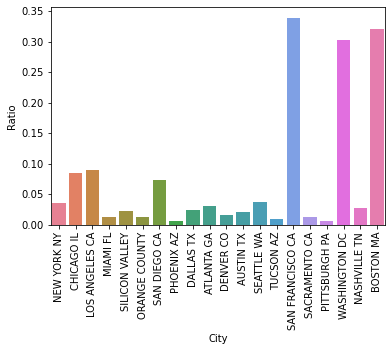

In [300]:
sns.barplot(x= city.City, y = city.Ratio, palette = 'husl')
plt.xticks(rotation = 90)
plt.show()

#### <i> We find that SAN FRANCISCO CA has the highest population percentage with 34% of its population signed up for a cab service, followed by BOSTON then WASHINGTON.</i>

#### <i> Checking the values of 'city' and 'cab', we find that San Francisco is missing from the second dataframe so we'll use Boston, the second highest population percentage for our next hypothesis.</i>

### <center> HYPOTHESIS 1: Boston, MA is the city with the highest number of users and rides </center>

In [74]:
#checking which city has the highest number of users
cab.groupby('City')['Users'].mean().sort_values(ascending = False)

City
NEW YORK NY       302149
CHICAGO IL        164468
LOS ANGELES CA    144132
WASHINGTON DC     127001
BOSTON MA          80021
SAN DIEGO CA       69995
SILICON VALLEY     27247
SEATTLE WA         25063
ATLANTA GA         24701
DALLAS TX          22157
MIAMI FL           17675
AUSTIN TX          14978
ORANGE COUNTY      12994
DENVER CO          12421
NASHVILLE TN        9270
SACRAMENTO CA       7044
PHOENIX AZ          6133
TUCSON AZ           5712
PITTSBURGH PA       3643
Name: Users, dtype: int64

In [86]:
#checking which city has the highest number of rides
cab.groupby('City')['Transaction ID'].count().sort_values(ascending = False)

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: Transaction ID, dtype: int64

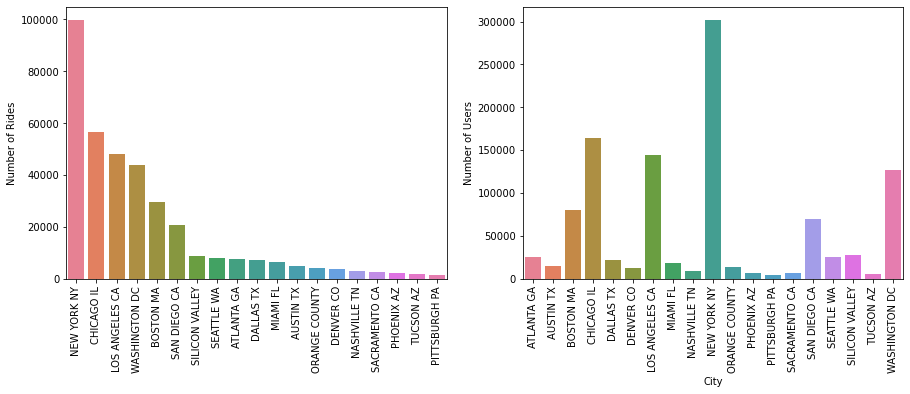

In [301]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.barplot(ax = axes[0], x = cab['City'].value_counts().index, y = cab['City'].value_counts(), palette = 'husl')
sns.barplot(ax= axes[1], data = cab, x = 'City', y = 'Users', palette = 'husl')
axes[0].set(ylabel = 'Number of Rides')
axes[1].set(ylabel = 'Number of Users')
axes[0].tick_params(axis='x', labelrotation = 90)
axes[1].tick_params(axis='x', labelrotation = 90)
plt.show()

### <i> Conclusion: Hypothesis was wrong. New York has the highest number of users, over 300 thousand users and also the biggest number of rides, around 100 thousand rides compared to Boston's 8 and 29 thousands respectively. </i>

<center>...</center>

### <center> HYPOTHESIS 2: New York is the city that brings forth the biggest profit </center>

In [39]:
#checking which city has the highest profit percentage
cab.groupby('City')['Profit Percentage'].mean().sort_values(ascending = False)

City
NEW YORK NY      95.84
DALLAS TX        54.69
SILICON VALLEY   54.20
MIAMI FL         41.21
ORANGE COUNTY    41.00
ATLANTA GA       39.22
AUSTIN TX        39.01
DENVER CO        36.10
PHOENIX AZ       33.32
LOS ANGELES CA   32.65
SAN DIEGO CA     28.53
WASHINGTON DC    27.36
TUCSON AZ        26.70
SEATTLE WA       26.67
PITTSBURGH PA    22.31
BOSTON MA        20.94
CHICAGO IL       20.73
SACRAMENTO CA    18.28
NASHVILLE TN     18.27
Name: Profit Percentage, dtype: float64

In [40]:
cab.groupby('City')['Profit'].sum().sort_values(ascending = False)

City
NEW YORK NY      27,962,555.16
LOS ANGELES CA    4,411,708.65
WASHINGTON DC     3,492,870.16
CHICAGO IL        3,387,313.41
BOSTON MA         1,768,719.27
SAN DIEGO CA      1,587,163.47
SILICON VALLEY    1,316,705.27
DALLAS TX         1,128,733.27
ATLANTA GA          842,432.88
MIAMI FL            758,301.24
SEATTLE WA          604,684.85
AUSTIN TX           526,701.03
ORANGE COUNTY       457,001.87
DENVER CO           397,585.01
PHOENIX AZ          192,940.88
NASHVILLE TN        149,532.22
TUCSON AZ           140,260.70
SACRAMENTO CA       117,326.19
PITTSBURGH PA        85,165.96
Name: Profit, dtype: float64

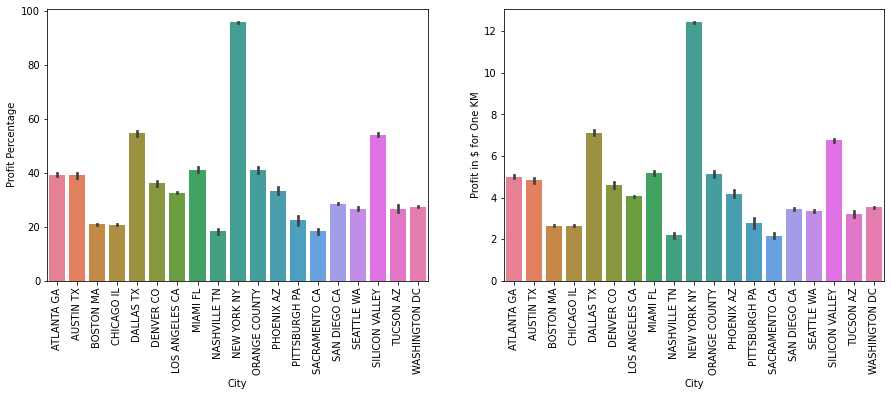

In [302]:
# check which city has higer profit percentage and profit per one kilometer
fig,axes = plt.subplots(1,2, figsize=(15, 5))
sns.barplot(ax= axes[0], data = cab, x='City', y = 'Profit Percentage', palette = 'husl')
sns.barplot(ax= axes[1], data = cab, x='City', y = cab['Profit by KM'], palette = 'husl')
axes[0].tick_params(axis='x', labelrotation = 90)
axes[1].tick_params(axis='x', labelrotation = 90)
axes[1].set(ylabel='Profit in $ for One KM')
plt.show()

### <i> Conclusion: Hypothesis was right. New York has the biggest mean profit, as well as the biggest profit percentage of 95%, which means the fare is almost doubled from the actual cost of the ride, making the net profit almost 28 million dollars for New York. </i>

<center>...</center>

### <center> HYPOTHESIS 3: Profit is higher in December for the holidays </center>

In [94]:
#We check the profit percentage of each month in the year
cab.groupby(cab['Date of Travel'].dt.month)['Profit Percentage'].mean().sort_values(ascending = False)

Date of Travel
2    60.54
5    60.05
1    55.59
3    54.93
4    53.39
6    52.95
12   46.31
11   44.17
9    43.60
10   42.32
7    39.40
8    36.03
Name: Profit Percentage, dtype: float64

In [95]:
#the net profit based on month of the year
cab.groupby(cab['Date of Travel'].dt.month)['Profit'].sum().sort_values(ascending = False)

Date of Travel
12   6,204,924.58
11   5,419,647.47
10   4,946,948.78
9    4,636,817.78
5    4,152,157.49
6    3,813,053.68
1    3,746,490.33
3    3,450,311.42
4    3,321,360.95
8    3,244,522.18
2    3,228,020.04
7    3,163,446.79
Name: Profit, dtype: float64

In [96]:
#profit by km travelled
cab.groupby(cab['Date of Travel'].dt.month)['Profit by KM'].mean().sort_values(ascending = False)

Date of Travel
2    7.81
5    7.79
1    7.13
3    7.07
4    6.88
6    6.84
12   5.86
11   5.60
9    5.58
10   5.38
7    5.05
8    4.59
Name: Profit by KM, dtype: float64

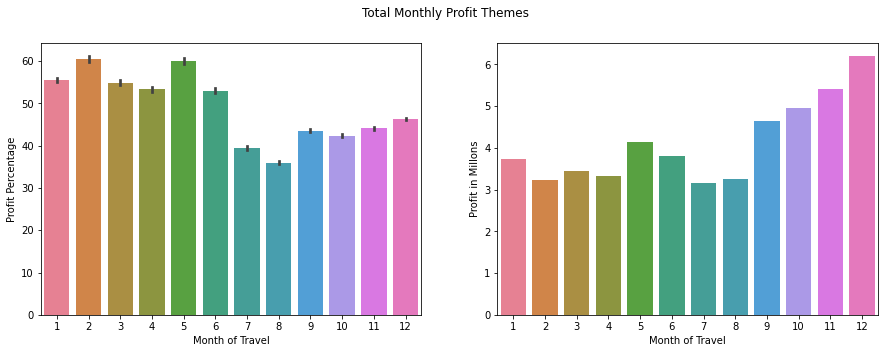

In [303]:
sumpermonth= cab.groupby(cab['Date of Travel'].dt.month)['Profit'].sum()
fig, axes = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('Total Monthly Profit Themes')
sns.barplot(ax = axes[0], x= cab['Date of Travel'].dt.month, y= cab['Profit Percentage'], palette = 'husl')
axes[0].set(xlabel = 'Month of Travel')
sns.barplot(ax = axes[1], x= sumpermonth.index, y= sumpermonth/1000000, palette = 'husl')
axes[1].set(xlabel = 'Month of Travel', ylabel = 'Profit in Millons')
plt.show()

#### We find a contradiction between the mean profit/profit per KM being relatively low in Dec while the new profit is the highest of the year then. To find out more, we'll check the number of rides and kilometers travelled during Dec.

In [100]:
#number of rides each month
ridepermonth = cab.groupby(cab['Date of Travel'].dt.month)['Transaction ID'].count()
ridepermonth.sort_values(ascending = False)

Date of Travel
12    47007
11    42700
10    40852
9     36859
8     31323
7     27676
6     24713
5     23701
1     23174
3     21646
4     21434
2     18307
Name: Transaction ID, dtype: int64

In [99]:
#sum of kilometers travelled
cab.groupby(cab['Date of Travel'].dt.month)['KM Travelled'].sum().sort_values(ascending = False)

Date of Travel
12   1,061,369.17
11     963,703.70
10     919,750.06
9      828,823.82
8      706,188.38
7      626,732.29
6      558,349.01
5      533,051.89
1      525,787.74
3      490,641.81
4      483,702.22
2      412,390.49
Name: KM Travelled, dtype: float64

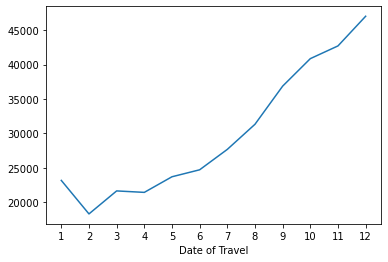

In [108]:
#line plot for ride progression throughout the year 
import matplotlib.ticker as ticker
ax1 = sns.lineplot(x= ridepermonth.index, y= ridepermonth.values)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))

### <i> Conclusion: Hypothesis was right. Net profit increased to a total of a little over 6.2 million dollars even though the profit of each ride went down due to holiday discounts, the increase in the number of customers made up for that decrease and the profit and money made ended up increasing.
Note: similarly, same thing happened with KM travelled, the profit of each KM went down but the increase in the number of KM travelled in total made for the profit increase overall.</i>

<center>...</center>

### <center> HYPOTHESIS 4: Yellow Cab is used more for rides and brings more profit than Pink Cab.  </center>

In [125]:
#we check the number of rides,profit percentage, profit per KM, net profit etc
companyride = cab.groupby('Company')['Transaction ID'].count()
companyride

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction ID, dtype: int64

In [142]:
companypercent = cab.groupby('Company')['Profit Percentage'].mean()
companypercent

Company
Pink Cab     25.56
Yellow Cab   54.30
Name: Profit Percentage, dtype: float64

In [152]:
companyprofit = cab.groupby('Company')['Profit'].mean()
companyprofit

Company
Pink Cab      62.65
Yellow Cab   160.26
Name: Profit, dtype: float64

In [164]:
companykm = cab.groupby('Company')['Profit by KM'].mean()
companykm

Company
Pink Cab     2.77
Yellow Cab   7.11
Name: Profit by KM, dtype: float64

In [124]:
cab.groupby('Company')['Profit'].sum()

Company
Pink Cab      5,307,328.32
Yellow Cab   44,020,373.17
Name: Profit, dtype: float64

#### Now we'll start plotting these numbers to visualize findings

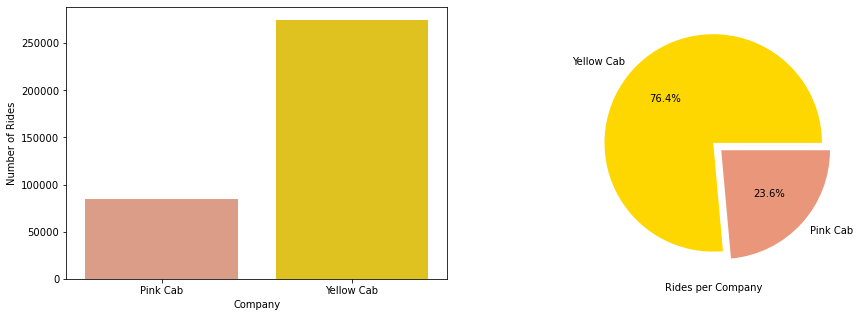

In [305]:
#Rides for each company and percentage of that
colors = sns.color_palette(['#FFD700', '#E9967A'])
fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.barplot(ax = axes[0],data=cab,x = companyride.index, y = companyride.values, palette=sns.color_palette(['#E9967A', '#FFD700']))
axes[1].pie(cab['Company'].value_counts(), labels = cab['Company'].value_counts().index,autopct= '%1.1f%%', colors = colors,explode = [0,0.1])
axes[0].set(ylabel= 'Number of Rides')
axes[1].set(xlabel= 'Rides per Company')
plt.show()

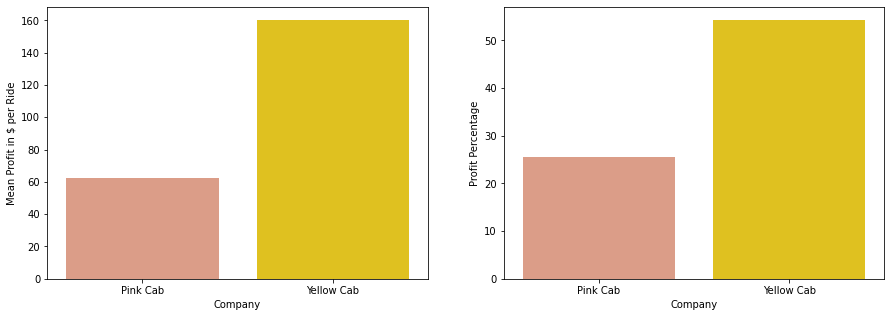

In [306]:
#Mean profit in $ and profit percentage
colors1 = sns.color_palette(['#E9967A', '#FFD700'])
fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.barplot(ax = axes[0],data=cab,x = companyprofit.index, y = companyprofit.values, palette = colors1)
sns.barplot(ax = axes[1],data=cab,x = companypercent.index, y = companypercent.values, palette= colors1)
axes[0].set(ylabel= 'Mean Profit in $ per Ride')
axes[1].set(ylabel= 'Profit Percentage')
plt.show()

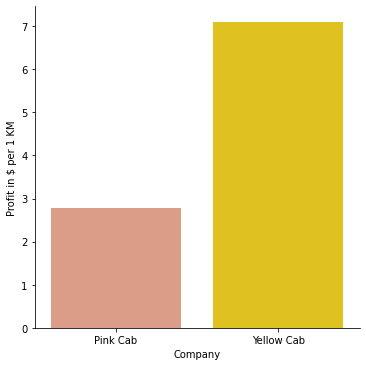

In [307]:
cat = sns.catplot(data = cab,kind= 'bar',palette = colors1,x= companykm.index, y= companykm.values)
cat.set(ylabel = 'Profit in $ per 1 KM')
plt.show()

### <i> Conclusion: Hypothesis was right. Yellow Cab brings in more profit and has a higher number of rides recorded as well as moee dollars in profit per one KM. In total, Yellow Cab's net profit over the recorded years was a bit over 44 million dollars while the profit of Pink Cab was only slightly above 5.3 million dollars. </i>

<center> ... </center>

#### <i><center> More analysis regarding the different companies: </center></i>

In [188]:
#Gender analysis of company users
cab.groupby('Company')['Gender'].value_counts()

Company     Gender
Pink Cab    Male       47231
            Female     37480
Yellow Cab  Male      158681
            Female    116000
Name: Gender, dtype: int64

In [203]:
pink= cab[cab.Company == 'Pink Cab'].groupby('Gender').Company.count()

In [202]:
yell = cab[cab.Company == 'Yellow Cab'].groupby('Gender').Company.count()

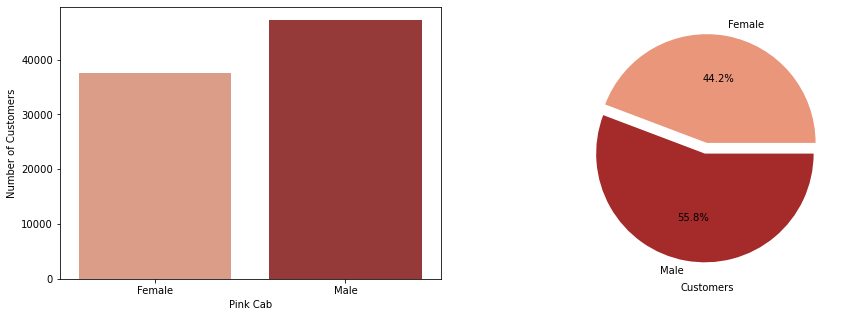

In [291]:
colors2 = sns.color_palette(["#E9967A", "#A52A2A"])
fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.barplot(ax= axes[0],x= pink.index, y=pink.values, palette= colors2)
axes[1].pie(pink, labels = pink.index,autopct= '%1.1f%%', colors = colors2,explode = [0,0.1])
axes[0].set(xlabel = 'Pink Cab', ylabel= 'Number of Customers')
axes[1].set(xlabel = 'Customers')
plt.show()

[Text(0.5, 0, 'Customers')]

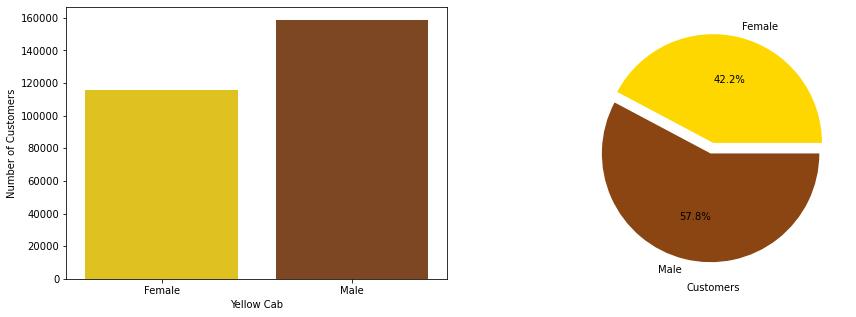

In [290]:
colors3 = sns.color_palette(["#FFD700", "#8B4513"])
fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.barplot(ax= axes[0], x= yell.index, y=yell.values, palette= colors3)
axes[1].pie(yell, labels = yell.index,autopct= '%1.1f%%', colors = colors3,explode = [0,0.1])
axes[0].set(xlabel = 'Yellow Cab', ylabel= 'Number of Customers')
axes[1].set(xlabel = 'Customers')

<center>...</center>

### <center> HYPOTHESIS 5: Customers under 35 use cab service more.  </center>

In [236]:
#Mean age for service user
cab['Age'].mean()

35.33670476805271

In [237]:
#Mean age for company users
cab.groupby('Company')['Age'].mean()

Company
Pink Cab     35.32
Yellow Cab   35.34
Name: Age, dtype: float64

#### Distribution graph for all ages using the cab service:

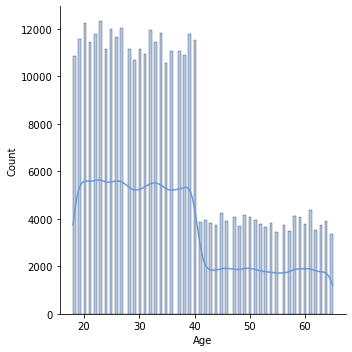

In [322]:
figsize = (15,5)
sns.displot(data=cab, x= 'Age', kde = True, color = '#69d')

#### Distribution graph for age for each company:

[Text(0.5, 0, 'Age for Pink Cab Users')]

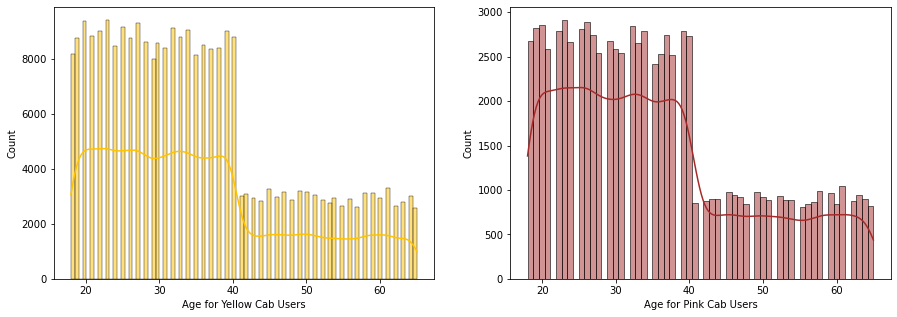

In [258]:
fig, axes = plt.subplots(1,2, figsize= (15,5))
sns.histplot(ax= axes[0],x= cab.Age[cab.Company == 'Yellow Cab'], kde = True, color = '#FFC300')
sns.histplot(ax= axes[1],x= cab.Age[cab.Company == 'Pink Cab'], kde = True, color = '#A52A2A')
axes[0].set(xlabel = 'Age for Yellow Cab Users')
axes[1].set(xlabel = 'Age for Pink Cab Users')

In [264]:
#number of customers under the age of 35
underthirtyfive = cab[cab.Age <=35].Age.count()

In [265]:
#number of customers over the age of 35
overthirtyfive = cab[cab.Age >=35].Age.count()

In [283]:
underpink= cab[(cab.Age <=35)& (cab.Company == 'Pink Cab')].Age.count()
overpink = cab[(cab.Age >35)&(cab.Company == 'Pink Cab')].Age.count()

In [284]:
underyell= cab[(cab.Age <=35)& (cab.Company == 'Yellow Cab')].Age.count()
overyell = cab[(cab.Age >35)&(cab.Company == 'Yellow Cab')].Age.count()

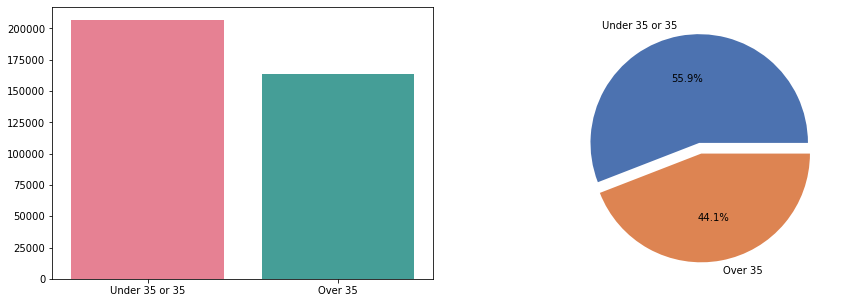

In [309]:
fig, axes = plt.subplots(1,2, figsize= (15,5))
sns.barplot(ax= axes[0],x= ['Under 35 or 35', 'Over 35'], y = [underthirtyfive, overthirtyfive], palette = 'husl')
axes[1].pie(x= [underthirtyfive, overthirtyfive], labels = ['Under 35 or 35', 'Over 35'], colors = sns.set_palette('husl'), autopct= '%1.1f%%', explode = [0,0.1])
plt.show()

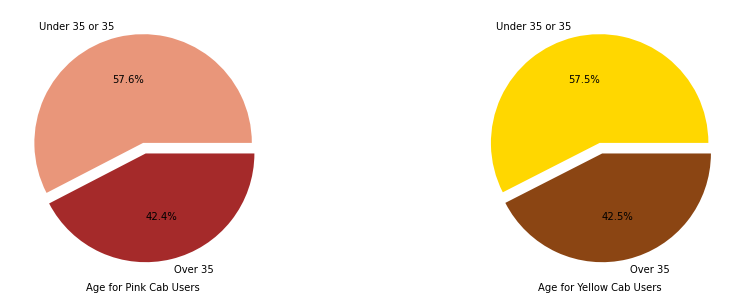

In [293]:
fig, axes = plt.subplots(1,2, figsize= (15,5))
axes[0].pie(x= [underpink, overpink], labels = ['Under 35 or 35', 'Over 35'], colors =sns.color_palette(["#E9967A", "#A52A2A"]), autopct= '%1.1f%%', explode = [0,0.1])
axes[1].pie(x= [underyell, overyell], labels = ['Under 35 or 35', 'Over 35'], colors =sns.color_palette(["#FFD700", "#8B4513"]), autopct= '%1.1f%%', explode = [0,0.1])
axes[1].set(xlabel = 'Age for Yellow Cab Users')
axes[0].set(xlabel = 'Age for Pink Cab Users')
plt.show()

### <i> Conclusion: Hypothesis is correct, people under or at the age of 35 use the cab service more in general and also at each company respectively. </i>

# <center>...</center>

#### Note: Hypotheses were explored using the population given as the whole population and therefore hypothesis testing was not employed as this was how the instructions indicated.

In [295]:
#saving master data
cab.to_csv('masterdata.csv',index = False)